In [ ]:
import pandas as pd
import numpy as np


In [ ]:
def list_info_with_nan(data):
    results = []
    for sublist in data:
        #total_length = len(sublist)  # Get the total length of the sublist
        non_nan_count = np.count_nonzero(~np.isnan(sublist))  # Count non-nan elements
        results.append(non_nan_count)
    return results


In [ ]:
import math

def euclidean_distance(point1, point2):
    """
    Calculates the Euclidean distance between two points.

    Args:
        point1 (tuple): Tuple containing the x and y coordinates of the first point.
        point2 (tuple): Tuple containing the x and y coordinates of the second point.

    Returns:
        float: Euclidean distance between the two points.
    """
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Example usage:
point_a = (1, 2)
point_b = (4, 6)
distance = euclidean_distance(point_a, point_b)
print("Euclidean distance between point A and point B:", distance)

Euclidean distance between point A and point B: 5.0


In [ ]:
summing_length=[]

In [ ]:
overall_performance=[]

In [ ]:
threshold_in_mm=10

In [ ]:
threshold=10

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_1_training_csv/CollectedData_bruce_30k.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_1_csv_10_keypoints/30_kSa_3p3_V_-340mV_offsetDLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
import pandas as pd


# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(20):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)
result = list_info_with_nan(count_list)
summing_length=result
overall_performance=counts
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[20, 20, 19, 13, 13, 6, 3, 5, 13, 13]
[100.0, 100.0, 100.0, 100.0, 100.0, 85.71428571428571, 100.0, 100.0, 100.0, 100.0]


range(20) is replaced by range(out_df.shape(0)) for this video frame size is 19 rather than 20

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_1_training_csv/CollectedData_bruce_120k.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_1_csv_10_keypoints/120_kSa_3p3_V_-340mV_offsetDLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)

# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(out_df.shape[0]):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)


[14, 17, 14, 5, 0, 2, 3, 5, 8, 8]
[82.3529411764706, 100.0, 100.0, 83.33333333333333, 0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_1_training_csv/CollectedData_bruce_90k.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_1_csv_10_keypoints/90_kSa_3p3_V_-340mV_offsetDLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)

# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(out_df.shape[0]):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[19, 19, 15, 2, 3, 0, 8, 3, 13, 13]
[100.0, 100.0, 100.0, 100.0, 100.0, 0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_2_training_csv/CollectedData_bruce_brust_18(2).csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_2_csv_10_keypoints/2-and-2-004-kHz-burst-18-2DLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)

# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(out_df.shape[0]):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[1, 13, 19, 18, 20, 0, 0, 19, 20, 20]
[5.0, 65.0, 95.0, 90.0, 100.0, 0, 0, 95.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_2_training_csv/CollectedData_bruce_2_003.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_2_csv_10_keypoints/2-and-2-003-kHz-continuousDLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)

# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(out_df.shape[0]):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[19, 10, 20, 20, 20, 15, 0, 17, 20, 20]
[95.0, 50.0, 100.0, 100.0, 100.0, 93.75, 0, 94.44444444444444, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_3_training_csv/CollectedData_Bruce_60_6a.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_3_csv_10_keypoints/Biphasic_60_Hz_channel_6_aDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)

# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(out_df.shape[0]):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[18, 18, 20, 20, 20, 16, 16, 19, 20, 20]
[90.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0, 95.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_3_training_csv/CollectedData_Bruce_60_6b.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_3_csv_10_keypoints/Biphasic_60_Hz_channel_6_bDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)

# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(out_df.shape[0]):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[19, 20, 20, 17, 18, 20, 20, 20, 20, 20]
[95.0, 100.0, 100.0, 85.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_4_training_csv/CollectedData_Bruce_TIS E3_34 and E14_46 (1).csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_4_csv_10_keypoints/TIS E3_34 and E14_46 (1)DLC_resnet50_fourth_batchMay15shuffle1_400000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)

# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(out_df.shape[0]):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[0, 20, 19, 0, 20, 20, 20, 20, 20, 20]
[0, 100.0, 95.0, 0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_4_training_csv/CollectedData_Bruce_TIS E3_34 and E14_46 (2).csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/batch_4_csv_10_keypoints/TIS E3_34 and E14_46 (2)DLC_resnet50_fourth_batchMay15shuffle1_400000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)

# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(out_df.shape[0]):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[0, 20, 20, 0, 20, 20, 20, 20, 20, 20]
[0, 100.0, 100.0, 0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
final_percentage=[100*a / b if b != 0 else 0 for a, b in zip(overall_performance, summing_length)]

In [ ]:
final_percentage

[80.88235294117646,
 89.20454545454545,
 98.80952380952381,
 94.05940594059406,
 98.52941176470588,
 98.01980198019803,
 100.0,
 97.70992366412214,
 100.0,
 100.0]

In [ ]:
body_parts=['hip','knee','ankle','heel','instep','toe_1','toe_2','toe_3','toe_4','toe_5']

In [ ]:

sentences = [
    f"Body part {part} has {percentage} percentage of chance for correct classification when threshold is {threshold} pixel"
    for part, percentage in zip(body_parts, final_percentage)
]

for sentence in sentences:
    print(sentence)


Body part hip has 80.88235294117646 percentage of chance for correct classification when threshold is 10 pixel
Body part knee has 89.20454545454545 percentage of chance for correct classification when threshold is 10 pixel
Body part ankle has 98.80952380952381 percentage of chance for correct classification when threshold is 10 pixel
Body part heel has 94.05940594059406 percentage of chance for correct classification when threshold is 10 pixel
Body part instep has 98.52941176470588 percentage of chance for correct classification when threshold is 10 pixel
Body part toe_1 has 98.01980198019803 percentage of chance for correct classification when threshold is 10 pixel
Body part toe_2 has 100.0 percentage of chance for correct classification when threshold is 10 pixel
Body part toe_3 has 97.70992366412214 percentage of chance for correct classification when threshold is 10 pixel
Body part toe_4 has 100.0 percentage of chance for correct classification when threshold is 10 pixel
Body part 

In [ ]:
my_dict={}

In [ ]:
my_dict[threshold]=final_percentage

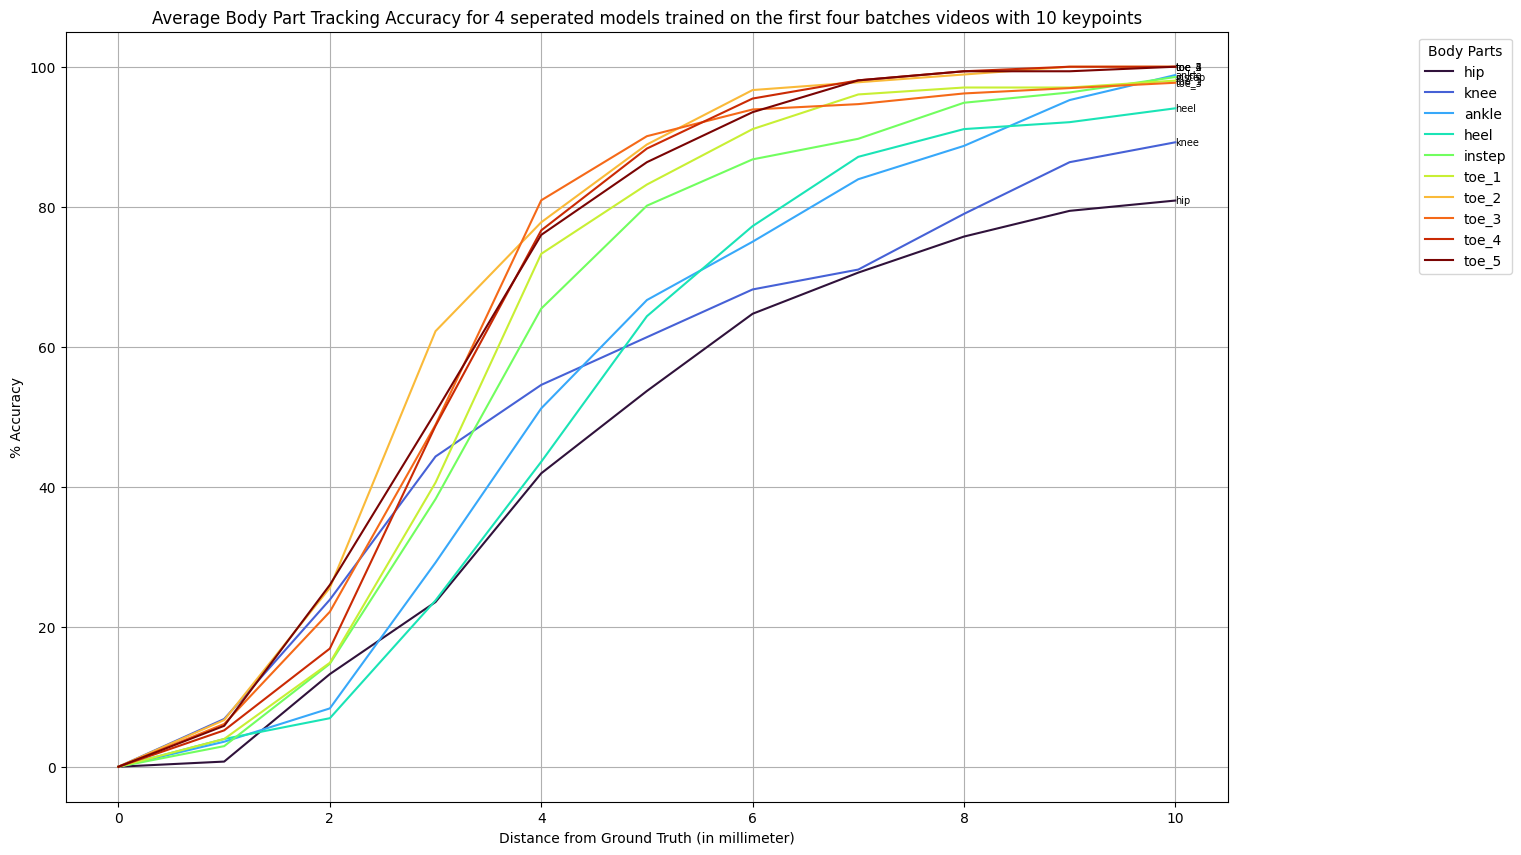

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import turbo
# Example dictionary

# Prepare data for plotting
thresholds = sorted(my_dict.keys())
body_parts_data = {i: [] for i in range(10)}  # Create a dictionary to hold data for each body part

for threshold in thresholds:
    accuracies = my_dict[threshold]
    for index, accuracy in enumerate(accuracies):
        body_parts_data[index].append(accuracy)

# Plotting
plt.figure(figsize=(15, 10))
colors = turbo(np.linspace(0, 1, len(body_parts_data)))
for part_index, accuracies in body_parts_data.items():
    plt.plot(thresholds, accuracies, color=colors[part_index],label=f'{body_parts[part_index]}')

    # Annotate the end point of each line with the line number
    plt.text(thresholds[-1], accuracies[-1],body_parts[part_index] ,fontsize=7,verticalalignment='center')

plt.xlabel('Distance from Ground Truth (in millimeter)')
plt.ylabel('% Accuracy')
plt.title('Average Body Part Tracking Accuracy for 4 seperated models trained on the first four batches videos with 10 keypoints')
plt.legend(title="Body Parts", loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()